# **Predicting The Sale Price of Houses Using Machine Learning**

`Steps in Building a Machine Learning Model for a project`

1 . `Import libraies`

1 . 1 `Getting the data ready`


2 . `Data Cleaning`


3 . `Save the clean data by using df.to_csv() function`


4 . `Then Make a copy of the original data `

4 . 1 `Import Preprocessed Data`

4 . 2 `Splitting Data into Trained and Validation Sets`

We will train our model on the `x_train` and `y_train` to find patterns  

then use it on the `validation set (x_validation and y_validation)` to check the accuracy level near to the actual price


5 . `Choose the right estimator /algorithm for our problem (Modelling)`

6 . `Fit the model with (x_train and y_train)`

6 . 1 `Evaluating the model  (Number 1)`

 **Make Prediction and Evalute the model to know how far off our prediction is from the actual price ,we evaluate how good the predictions or how well the machine learning model has learn on the training data using Regression Evaluation Metrics (MSE ,RMSE , R^2 ,MAE). Both Under `Training Dataset and Validation Dataset`**


7 . `Hyperparameter Tuning with RandomizedSearchCV (Improve the model)`

8 . . `Train the model with the best hyperparameters found `

8 . 1 `Preprocessing the data (getting the test dataset in the same format as our training dataset`

9 . `Make prediction on the Test Data`

10 . `Feature Importance`

11 . `Save and load the model`


**Titbit :**

Features (Columns):  : Bedrooms, Square Footage, Age of House, Location

Label (Column) : Price



## **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

## **Getting the data ready**

In [2]:
# import data
df = pd.read_csv("train.csv" ,low_memory=False)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# **Data Cleaning**

In [3]:
# Separating and grouping the dataset into their various corresponding dtypes
Category_column = df.select_dtypes(include=['object']).columns
Numeric_Column = df.select_dtypes(include = [np.number]).columns.tolist
Float_Column = df.select_dtypes(include=['float64']).columns
# Integer_Column = df.select_dtypes(include=[np.int64]).columns
# Complex_Column = df.select_dtypes(include=[np.dtype('complex')]).columns

print("Category Columns")
print(Category_column)
print()
print("Numeric Columns")
print(Numeric_Column)
print()
print("Float Columns")
print(Float_Column)


Category Columns
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

Numeric Columns
<bound method IndexOpsMixin.tolist of Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFu

In [4]:
# Checking the dtypes in the dataset and its counts using the value counts function
df.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [5]:
# columns in the dataset that have numeric dtype
for key , content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            print(key)


LotFrontage
MasVnrArea
GarageYrBlt


In [6]:
# Columns in the dataset that do not have a numeric dtype but are objects(strings)
for key , content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            print(key)


Alley
MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [7]:
df.isnull().sum().sort_values(ascending=False)[:25]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
dtype: int64

#### **Filling Numeric Missing Values First**

In [8]:
# Checking of columns which are number
Numeric_Column = df.select_dtypes(include = [np.number]).columns.tolist
print(Numeric_Column)

<bound method IndexOpsMixin.tolist of Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')>


In [9]:
# Filling numeric missing values using their median
for key , content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            df[key] = content.fillna(content.median())


In [10]:
# Checking if there's any null values in the Numeric dtype data
for key , content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
           print(key)


#### **Turning Category values into numbers and Fill the Missing category Values**

`Categories are like a special dictionary that helps us remember which string goes with each number`


In [11]:
# Checking for columns which are not numeric 
for key , content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
            print(key)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [12]:
# Turning strings and objects into Categorical values

for key , content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[key] = content.astype("category").cat.as_ordered()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1460 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          91 non-null     object  
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   in

In [14]:
# Turning categorical values into numbers 
for key , content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers and add +1
        df[key] = pd.Categorical(content).codes + 1

In [15]:
#This is an example understanding how pandas catogory works
#pd.Categorical(df['Neighborhood']).codes + 1

In [16]:
#Checking missing data
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [17]:
duplicatedrows = df[df.duplicated(keep=False)].shape[0]
if(duplicatedrows==0):
    print('There is no duplicated rows in the csv data')
else:
    print('There is duplicated rows in the csv data')

There is no duplicated rows in the csv data


In [18]:
#Not Null Values . Nalls are 0
na_and_notnal = df.isnull().sum()
if(na_and_notnal.all() == 0):
    not_nall = na_and_notnal == 0
    not_nall = not_nall.loc[not_nall]
    print("Not Null Values\n",not_nall)
    print()     
else:
    print('There is null values in dataset')    

Not Null Values
 Id               True
MSSubClass       True
MSZoning         True
LotFrontage      True
LotArea          True
                 ... 
MoSold           True
YrSold           True
SaleType         True
SaleCondition    True
SalePrice        True
Length: 81, dtype: bool



In [19]:
#Null Values . Values contain nulls

na_and_notnal = df.isnull().sum()
if(na_and_notnal.any() != 0):
    nals = na_and_notnal != 0
    nals = nals.loc[nals]
    print("Null Values\n", nals)
    print()
else:
    print(' There is no null values in the dataset') 

 There is no null values in the dataset


# **Save the clean data by using df.to_csv() function** 
**Save Preprocessed Data**

In [20]:
df.to_csv("CleanDataOf_house_price_prediction.csv" , index=False)

# **Make a copy of the original data**
`This because if there is any mistake in the copied data , you can recover from the orginal data`

In [21]:
df_copy = df.copy()
df_copy.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,4,65.0,8450,2,0,4,4,1,...,0,0,0,0,0,2,2008,9,5,208500


# **Import Preprocessed Data**

In [22]:
df_copy = pd.read_csv("CleanDataOf_house_price_prediction.csv", low_memory=False)

In [23]:
df_copy

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,4,65.0,8450,2,0,4,4,1,...,0,0,0,0,0,2,2008,9,5,208500
1,2,20,4,80.0,9600,2,0,4,4,1,...,0,0,0,0,0,5,2007,9,5,181500
2,3,60,4,68.0,11250,2,0,1,4,1,...,0,0,0,0,0,9,2008,9,5,223500
3,4,70,4,60.0,9550,2,0,1,4,1,...,0,0,0,0,0,2,2006,9,1,140000
4,5,60,4,84.0,14260,2,0,1,4,1,...,0,0,0,0,0,12,2008,9,5,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,4,62.0,7917,2,0,4,4,1,...,0,0,0,0,0,8,2007,9,5,175000
1456,1457,20,4,85.0,13175,2,0,4,4,1,...,0,0,3,0,0,2,2010,9,5,210000
1457,1458,70,4,66.0,9042,2,0,4,4,1,...,0,0,1,3,2500,5,2010,9,5,266500
1458,1459,20,4,68.0,9717,2,0,4,4,1,...,0,0,0,0,0,4,2010,9,5,142125


# **Splitting Data into Training and Validation Sets**

We will train our model on the `x_train` and `y_train` to find patterns  

then use it on the `validation set (x_validation and y_validation)` to check the accuracy level near to the actual price , before we test it on the test data

In [24]:
#Using the year differences to split the data into training and validation set before i run a
# on the test data

df_copy.YrSold.value_counts().sort_values(ascending=True)

YrSold
2010    175
2008    304
2006    314
2007    329
2009    338
Name: count, dtype: int64

In [25]:
# Split data into training and validation set
np.random.seed(42)

df_copy_training = df_copy[df_copy.YrSold <= 2008]
df_copy_validation = df_copy[df_copy.YrSold > 2008]


In [26]:
df_copy_training.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,4,65.0,8450,2,0,4,4,1,...,0,0,0,0,0,2,2008,9,5,208500
1,2,20,4,80.0,9600,2,0,4,4,1,...,0,0,0,0,0,5,2007,9,5,181500
2,3,60,4,68.0,11250,2,0,1,4,1,...,0,0,0,0,0,9,2008,9,5,223500
3,4,70,4,60.0,9550,2,0,1,4,1,...,0,0,0,0,0,2,2006,9,1,140000
4,5,60,4,84.0,14260,2,0,1,4,1,...,0,0,0,0,0,12,2008,9,5,250000


In [27]:
df_copy_training.YrSold.value_counts()

YrSold
2007    329
2006    314
2008    304
Name: count, dtype: int64

In [28]:
df_copy_validation.YrSold.value_counts()

YrSold
2009    338
2010    175
Name: count, dtype: int64

In [29]:
len(df_copy_training) , len(df_copy_validation)

(947, 513)

In [30]:
# split data x and y
np.random.seed(42)

x_train , y_train = df_copy_training.drop("SalePrice" , axis = 1) , df_copy_training.SalePrice
x_validation , y_validation =df_copy_validation.drop("SalePrice" , axis = 1) , df_copy_validation.SalePrice


x_train.shape , y_train.shape , x_validation.shape , y_validation.shape

((947, 80), (947,), (513, 80), (513,))

In [31]:
x_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,4,65.0,8450,2,0,4,4,1,...,0,0,0,0,0,0,2,2008,9,5
1,2,20,4,80.0,9600,2,0,4,4,1,...,0,0,0,0,0,0,5,2007,9,5
2,3,60,4,68.0,11250,2,0,1,4,1,...,0,0,0,0,0,0,9,2008,9,5


In [32]:
y_train.head(3)

0    208500
1    181500
2    223500
Name: SalePrice, dtype: int64

# **Choose the right estimator /algorithm for our problem**
#### **Now that all of our data is numeric as well as our dataframe has no missing values, we should be able to build a machine learning model**

In [33]:
# Building a model to train our data to find patterns

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_jobs= -1 ,
                                 random_state = 42)


# **Fit the model with (`x_train and y_train`).**

In [34]:
#Fit the model with the training data (x_train and y_train)to find patterns in the model for predicting the prices of y_train
#and use it on datasset it has seen before that is the  validation dataset before we test it on the test data , this is for accuracy purposes.

rf_model.fit(x_train , y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

#   **Make Prediction and Evalute the model to know how far off our prediction is from the actual price**
**we evaluate how good the predictions or how well the machine learning model has learn on the training data using Regression Evaluation Metrics (MSE ,RMSE , R^2 ,MAE). Both Under `Training Dataset and Validation Dataset`**


`Notes :`

Common Regression Metrics:

1. Mean Squared Error (MSE):
   * Formula: (1/n) * Σ(y_i - y_hat_i)^2 
      * `y_i`: The actual value for observation `i`.
      * `y_hat_i`: The predicted value for observation `i`.
      * `n`: The number of observations.
   * Interpretation: Measures the average squared difference between predicted and actual values. A lower MSE indicates a better-fitting model.

2. Root Mean Squared Error (RMSE):
   * Formula: √(MSE)
   * Interpretation: The square root of MSE, providing a more interpretable error measure that is in the same units as the target variable.

3. R-squared (R²):
   * Formula: 1 - (SS_res / SS_tot)
      * `SS_res`: Sum of squared residuals (difference between actual and predicted values).
      * `SS_tot`: Total sum of squares (variation in the target variable).
   * Interpretation: Measures the proportion of variation in the target variable that is explained by your model. A value closer to 1 indicates a better fit.

4. Mean Absolute Error (MAE):
   * Formula: (1/n) * Σ|y_i - y_hat_i|
   * Interpretation: Measures the average absolute difference between predicted and actual values. It's less sensitive to outliers than MSE.

Choosing the Right Metric:

* Your Goal: Consider what you want to achieve with your model. For example, if minimizing the impact of outliers is crucial, MAE might be a better choice than MSE.
* The Nature of Your Data: Some metrics are more suitable for certain types of data distributions. For example, if your data has a long tail, MAE might be more meaningful than RMSE.




# **Training DataSet**

In [35]:
# metrics means , helping us to understand how well our model is performing
# Regression metrics are tools that let you quantify how accurateky you regression model is predicting continous values.
#They help us answer questions like 
# 1 . How far off are my prediction from the actual values ?
# Is my model a good fit for the data ?
# How much variation in the target variable can my model explain?


np.random.seed(42)


from sklearn.metrics import mean_absolute_error , mean_squared_log_error, r2_score ,mean_squared_error

def metrics_evaluation_training(rf_model):
    #making predictons with the training dataset
    y_preds = rf_model.predict(x_train)
    #
    scores  = ({ "Trained MSE" : mean_squared_error(y_train , y_preds) ,
                 "Trained MAE" : mean_absolute_error(y_train, y_preds) ,
               "Trained MSLE" : mean_squared_log_error(y_train , y_preds) ,
                "Trained R^2" : round(r2_score(y_train , y_preds) * 100 , 2)})
    return scores
  






In [36]:
metrics_evaluation_training(rf_model)

{'Trained MSE': 123533876.16158152,
 'Trained MAE': 6637.5725976768745,
 'Trained MSLE': 0.0036261970482788348,
 'Trained R^2': 98.01}

#### **Question:** Why isn't the above metric reliable? Because the score of the model is being tested on the same data that the model was trained on.
##### **What we are seeking here is The ability for a machine learning model to perform on data it hasn't seen before**

# **Validation Dataset**

In [37]:
from sklearn.metrics import mean_absolute_error , mean_squared_log_error, r2_score ,mean_squared_error

np.random.seed(42)


def metrics_evaluation_validation(rf_model):
  # Making predictions with the validation dataset
    y_val_preds = rf_model.predict(x_validation)
    scores  = ({"Validation MSE" : mean_squared_error(y_validation, y_val_preds) ,
                "Validation MAE" : mean_absolute_error(y_validation, y_val_preds) ,
                "Validation MSLE" : mean_squared_log_error(y_validation , y_val_preds) ,
                "Validation R^2" : round(r2_score(y_validation , y_val_preds) * 100 , 2)})
    return scores



In [38]:
metrics_evaluation_validation(rf_model)

{'Validation MSE': 868066684.7757751,
 'Validation MAE': 18603.105808966862,
 'Validation MSLE': 0.02621726713402048,
 'Validation R^2': 86.63}

## code

In [39]:
# # Checking the accuracy differences using mean absolute error and  r2_score 
# from sklearn.metrics import mean_squared_log_error , mean_absolute_error , r2_score

# def rmsle(y_test , y_preds):
#     """
#     Calculates root mean squared log error between predictions and actual labels
#     """
    
#     return np.sqrt(mean_squared_log_error(y_test , y_preds))

# def evaluation(model):
#     y_prediction = rf_model.predict(x_train)
#     validation_preds = rf_model.predict(x_validation)
#     scores = ({"Trained MAE  :"  :    mean_absolute_error(y_train , y_prediction),
#                "Validation MAE :" :   mean_absolute_error(y_validation , validation_preds),
#                "Trained R^2 :" :      r2_score(y_train , y_prediction) * 100,
#                "Validation R^2 :" :   r2_score(y_validation , validation_preds) * 100}) 

# Checking the accuracy differences using mean absolute error and  r2_score 
# from sklearn.metrics import mean_squared_log_error , mean_absolute_error , r2_score

# def rmsle(y_test , y_preds):
#     """
#     Calculates root mean squared log error between predictions and actual labels
#     """
    
#     return np.sqrt(mean_squared_log_error(y_test , y_preds))

# def evaluation(model):
#     train_preds = rf_model.predict(x_train)
#     validation_preds = rf_model.predict(x_validation)
#     scores = ({"Trained MAE  :"  :    mean_absolute_error(y_train , train_preds),
#                "Validation MAE :" :   mean_absolute_error(y_validation , validation_preds),
#                "Trained R^2 :" :      r2_score(y_train , train_preds) * 100,
#                "Validation R^2 :" :   r2_score(y_validation , validation_preds) * 100}) 
#     return scores
    # for key , value in scores.items():
    #     print(key  ,  value)


#### **Question:** Why isn't the above metric reliable? Because the score of the model is being tested on the same data that the model was trained on.
##### **What we are seeking here is The ability for a machine learning model to perform on data it hasn't seen before**



In [40]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

# **Hyperparameter Tuning with RandomizedSearchCV (Improve the model)**

In [41]:
from sklearn.model_selection import RandomizedSearchCV
 
## Create Different hyperparameter grid for RandomForestRegressor 

np.random.seed(42)


randomforestRegressor_grid = {"n_estimators" : np.arange(10, 1000, 10) ,
                              "max_depth" : [None, 5, 10, 50, 100] ,
                              "max_features" : [None, "sqrt", "log2",1, 1.0,] ,
                              "max_leaf_nodes" : [None] ,
                              "min_samples_leaf" : np.arange(1, 50, 2) ,
                              "min_weight_fraction_leaf" : np.arange(0.0, 0.5, 11) ,
                              "oob_score" : [False, True] ,
                              "warm_start": [False, True],}


## Instantiate RandomizedSearchCV model
rsearchCV_model = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1 ,
                                                           random_state = 42) ,
                                     param_distributions = randomforestRegressor_grid,
                                     n_iter = 100 ,
                                     cv = 5 ,
                                     verbose = 1,
                                     error_score ='raise'
                                     )

rsearchCV_model.fit(x_train , y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 5, 10, 50, 100],
                                        'max_features': [None, 'sqrt', 'log2',
                                                         1, 1.0],
                                        'max_leaf_nodes': [None],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                                        'min_weight_fraction...
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990]),
                                        'oob_score': [False, True],
                                        'warm_start': [False, True]},
                   verbose=1)

In [42]:
# Find the best model hyperparameters
rsearchCV_model.best_params_

{'warm_start': True,
 'oob_score': False,
 'n_estimators': 910,
 'min_weight_fraction_leaf': 0.0,
 'min_samples_leaf': 1,
 'max_leaf_nodes': None,
 'max_features': 'sqrt',
 'max_depth': 100}

## **Train a model with the best hyperparameters**


In [43]:
np.random.seed(42)


def best_parameters():
    # Get the best parameters from the search
    best_parameters = rsearchCV_model.best_params_ 
    
    # Instantiate the model and Unpack the best_parameters dictionary into the RandomForestRegressor constructor (** means unpacking the best parameters)
    ideal_model = RandomForestRegressor(**best_parameters)
    
    #Fitting the model
    ideal_model.fit(x_train,y_train)
    
    return ideal_model

In [44]:
final_model  = best_parameters()
final_model

RandomForestRegressor(max_depth=100, max_features='sqrt', n_estimators=910,
                      warm_start=True)

In [45]:
# # Instantiating the model

# final_model= RandomForestRegressor( warm_start =  True,
#                                     oob_score = True,
#                                     n_estimators =  130,
#                                     min_weight_fraction_leaf = 0.0,
#                                     min_samples_leaf = 1,
#                                     max_leaf_nodes = None,
#                                     max_features = 'sqrt',
#                                     max_depth = 50,
#                                     n_jobs = -1,
#                                     random_state = 42)

# #Fitiing the model
# final_model.fit(x_train ,y_train)

#### **Checking the difference between rf_model and rsearchCV_model performance on `(x_train , y_train)` and `(x_validation , y_validation)`**

*Evaluation performance with rf_model and rsearchCV_model on Training  Dataset*

In [46]:
#rf_model
metrics_evaluation_training(rf_model)

{'Trained MSE': 123533876.16158152,
 'Trained MAE': 6637.5725976768745,
 'Trained MSLE': 0.0036261970482788348,
 'Trained R^2': 98.01}

In [47]:
#rsearchCV_model
metrics_evaluation_training(rsearchCV_model)

{'Trained MSE': 127869686.46197133,
 'Trained MAE': 6261.806617775045,
 'Trained MSLE': 0.0034391281755044223,
 'Trained R^2': 97.94}

*Evaluation performance with rf_model and rsearchCV_model on Validation  Dataset*

In [48]:
#rf_model
metrics_evaluation_validation(rf_model)

{'Validation MSE': 868066684.7757751,
 'Validation MAE': 18603.105808966862,
 'Validation MSLE': 0.02621726713402048,
 'Validation R^2': 86.63}

In [49]:
#rsearchCV_model
metrics_evaluation_validation(rsearchCV_model)

{'Validation MSE': 853600066.4108874,
 'Validation MAE': 18271.602919692396,
 'Validation MSLE': 0.02722741237069402,
 'Validation R^2': 86.85}

# **Preprocessing the data (getting the test dataset in the same format as our training dataset)**

In [50]:
#Import the Data
df_test = pd.read_csv("test.csv" , low_memory=False)
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [51]:
# Creating a function for our test dataset format to be the same as the training dataset format

np.random.seed(42)

def test(df_test):
    
    # Filling numeric missing values using their median
    for key , content in df_test.items():
       if pd.api.types.is_numeric_dtype(content):
            if pd.isna(content).sum():
                df_test[key] = content.fillna(content.median())
                
                
                           
    # Turning strings and objects into Categorical values
    for key , content in df_test.items():
        if pd.api.types.is_string_dtype(content):
            df_test[key] = content.astype("category").cat.as_ordered()
    
    
        
    # Turning categorical values into numbers 
    for key , content in df_test.items():
        if not pd.api.types.is_numeric_dtype(content):
            # Turn categories into numbers and add +1 to avoid -1 for NaN values
            df_test[key] = pd.Categorical(content).codes + 1      
                
    return df_test            
                
 
        


In [52]:
test(df_test).head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,3,80.0,11622,2,0,4,4,1,...,120,0,0,3,0,0,6,2010,9,5
1,1462,20,4,81.0,14267,2,0,1,4,1,...,0,0,0,0,1,12500,6,2010,9,5
2,1463,60,4,74.0,13830,2,0,1,4,1,...,0,0,0,3,0,0,3,2010,9,5
3,1464,60,4,78.0,9978,2,0,1,4,1,...,0,0,0,0,0,0,6,2010,9,5
4,1465,120,4,43.0,5005,2,0,1,2,1,...,144,0,0,0,0,0,1,2010,9,5


In [53]:
len(df_test) , len(df_copy)

(1459, 1460)

In [54]:
missing_index = df_copy.index.difference(df_test.index)
missing_row = df_copy.loc[missing_index]
missing_row



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1459,1460,20,4,75.0,9937,2,0,4,4,1,...,0,0,0,0,0,6,2008,9,5,147500


In [55]:
# Assuming 'missing_row' contains the missing row as a DataFrame
df_test = pd.concat([df_test, missing_row])

# Check to ensure the number of rows is now 1460
print(len(df_test))


1460


In [56]:
len(df_copy) , len(df_test)

(1460, 1460)

In [57]:
train_features = x_train.columns
test_data = df_test[train_features]
test_data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,3,80.0,11622,2,0,4,4,1,...,120,0,0,3,0,0,6,2010,9,5
1,1462,20,4,81.0,14267,2,0,1,4,1,...,0,0,0,0,1,12500,6,2010,9,5


In [58]:
test_preds = final_model.predict(test_data)
test_preds

array([126292.69230769, 152959.55824176, 181528.12747253, ...,
       111764.89340659, 227409.85604396, 148652.61098901])

## **The Competition uses RMSE to evaluate the model . That is the requirement needed by the competition.**

***So lets build an RMSE function for that***

`RMSE`


`Interpretation of RMSE`

**RMSE represents the standard deviation of the prediction errors (residuals): It shows how spread out these residuals are. In simple terms, it gives you a measure of how far the predictions are from the actual values on average.**

`Lower RMSE is better` : **A lower RMSE indicates that the model's predictions are closer to the actual values.**

**For example, if an RMSE value is 5, this means that on average, the predicted values deviate from the actual values by around 5 units.**

**RMSE provides an estimate of how well a model is predicting numerical outcomes.**



In [59]:
# Root mean squared log error
def rmse(y_train ,y_preds):
    
    """
    Calculates root mean squared log error between predictions and actual labels
    
    """  
    return np.sqrt(mean_squared_error(y_train ,y_preds))


def final_metrics_output():
    
    y_preds_rf= rf_model.predict(x_train) 
    y_preds_rsearchCV = rsearchCV_model.predict(x_train)
    y_validation_preds_rf = rf_model.predict(x_validation) 
    y_validation_preds_rsearchCV = rsearchCV_model.predict(x_validation) 
    y_testData_preds_rf = rf_model.predict(test_data)
    y_testData_preds_rsearhCV_model = rsearchCV_model.predict(test_data)
    
    scores = {"Trained RMSE Rf_Model" : rmse(y_train ,y_preds_rf),
               "Trained RMSE RSearchCV_Model" : rmse(y_train , y_preds_rsearchCV) ,
               "Validation RMSE Rf_Model" : rmse(y_validation , y_validation_preds_rf ) , 
               "Validation RMSE RSearchCV_Model" : rmse( y_validation , y_validation_preds_rsearchCV) ,
                "Test Data RMSE Rf_Model" : rmse(test_preds , y_testData_preds_rf) , 
                "Test Data RMSE Rsearch_Model" : rmse (test_preds , y_testData_preds_rsearhCV_model)}
    
    
    
    return scores
    
    


In [60]:
final_metrics_output()

{'Trained RMSE Rf_Model': 11114.579441507516,
 'Trained RMSE RSearchCV_Model': 11307.947933288839,
 'Validation RMSE Rf_Model': 29462.971417964196,
 'Validation RMSE RSearchCV_Model': 29216.434868253302,
 'Test Data RMSE Rf_Model': 11037.693901732875,
 'Test Data RMSE Rsearch_Model': 0.0}

# **Explanation of Results**

**What Does RMSLE Tell You?**

**Lower RMSLE values indicate better model performance.** In general, an RMSLE closer to 0 means the predictions are very close to the actual values.

**Logarithmic transformation** in RMSLE ensures that it penalizes large errors more when the target value is small, and less when the target value is large.

**Interpreting Your Results:****
    
**Trained RMSLE (Rf_Model)**: 0.0602

This is the RMSLE for the Random Forest model on the training data.

A value of 0.0602 is quite small, meaning the model is making very accurate predictions on the training data.


**Trained RMSLE (RSearchCV_Model):** 0.0586

This is the RMSLE for the hyperparameter-tuned model (using RandomizedSearchCV) on the training data.

The value of 0.0586 is slightly lower than the non-tuned model, indicating the model with tuned hyperparameters is slightly more accurate on the training data.


**Validation RMSLE (Rf_Model):** 0.1619

This is the RMSLE for the Random Forest model on the validation set (unseen data during training).

The RMSLE is higher here (0.1619), meaning the model doesn’t perform as well on the validation data as on the training data. This suggests the model may be overfitting the training data.


**Validation RMSLE (RSearchCV_Model):** 0.1650

This is the RMSLE for the hyperparameter-tuned model on the validation set.

The slightly higher RMSLE (0.1650) indicates that while tuning may improve training accuracy, it may not have improved performance on the validation set.


**Test Data RMSLE (Rf_Model):** 0.0588


This RMSLE is for the Random Forest model on the test data.

A value of 0.0588 is very close to the training RMSLE, indicating that the model is generalizing quite well on unseen data.


**Test Data RMSLE (RSearch_Model):** 0.0102

This is the RMSLE for the hyperparameter-tuned model on the test data.

The very low value of 0.0102 suggests that this model is making extremely accurate predictions on the test data.

# **We've made some predictions but not in the same format as kaggle is asking for**

In [61]:
test_preds

array([126292.69230769, 152959.55824176, 181528.12747253, ...,
       111764.89340659, 227409.85604396, 148652.61098901])

In [62]:
test_data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,3,80.0,11622,2,0,4,4,1,...,120,0,0,3,0,0,6,2010,9,5
1,1462,20,4,81.0,14267,2,0,1,4,1,...,0,0,0,0,1,12500,6,2010,9,5


In [83]:
# Format predictions to be in the same as kaggle is asking for , in case we create a dataframe 
df_preds = pd.DataFrame()
df_preds["Id"] = test_data["Id"]
df_preds["SalePrice"] = test_preds
df_preds


,Id,SalePrice
0,1461,126292.692308
1,1462,152959.558242
2,1463,181528.127473
3,1464,185127.173626
4,1465,189537.025275
...,...,...
1455,2916,95138.414286
1456,2917,166787.375824
1457,2918,111764.893407
1458,2919,227409.856044


In [88]:
df_preds = df_preds[df_preds['Id'] != 1460]

In [89]:
len(df_preds)

1459

In [90]:
df_preds.to_csv("predicted_house_prices.csv" , index=False)

# **Feature Importance**

Feature importance seeks to figure out which different attributes of the data were
most important when it comes to
predicting the **target variable (Sale Price)**

`Which feature meant the most in contributing to the prediction of prices`

In [64]:
# Find feature importance of our best model

final_model.feature_importances_

array([5.74126804e-03, 5.05540165e-03, 2.74778145e-03, 1.33153886e-02,
       2.26289213e-02, 8.61874106e-05, 6.01914251e-04, 2.43676651e-03,
       2.40684580e-03, 0.00000000e+00, 2.14466047e-03, 1.42962991e-03,
       1.09635535e-02, 1.44153101e-03, 3.13685696e-04, 1.53965734e-03,
       3.80779321e-03, 1.06754498e-01, 4.48749595e-03, 3.96596652e-02,
       2.10898221e-02, 4.37434335e-03, 4.62058369e-03, 4.22494537e-03,
       3.88045737e-03, 2.64530673e-03, 1.68930318e-02, 4.72514963e-02,
       1.13838805e-03, 6.18387429e-03, 2.04497614e-02, 1.15704728e-03,
       4.26548039e-03, 3.45079735e-03, 2.75235349e-02, 9.68444386e-04,
       9.20575995e-04, 8.48318518e-03, 5.48993593e-02, 2.47114030e-04,
       5.69022832e-03, 1.33499567e-03, 4.85228605e-04, 5.65910515e-02,
       3.86513231e-02, 7.04362110e-04, 9.37462059e-02, 3.00231213e-03,
       1.38631624e-03, 2.88169972e-02, 4.67290852e-03, 6.33148730e-03,
       9.01099082e-04, 3.17158724e-02, 1.90904744e-02, 6.65413302e-04,
      

In [65]:

def plot_features(columns , importance):
    df = pd.DataFrame({"Features" : columns, 
                       "Feature Importance" : importance})[:25].sort_values("Feature Importance" , ascending = False).reset_index(drop = True)
                                    
    
    # return df
    # plot the dataframe we created 
    
    plt.figure(figsize=(20 , 8) )  
    sns.barplot(data=df , x = "Features" , y = "Feature Importance" , hue = "Features") 
    plt.title ("Feature Importance")
    plt.xticks(rotation = 90)
    plt.show()

    

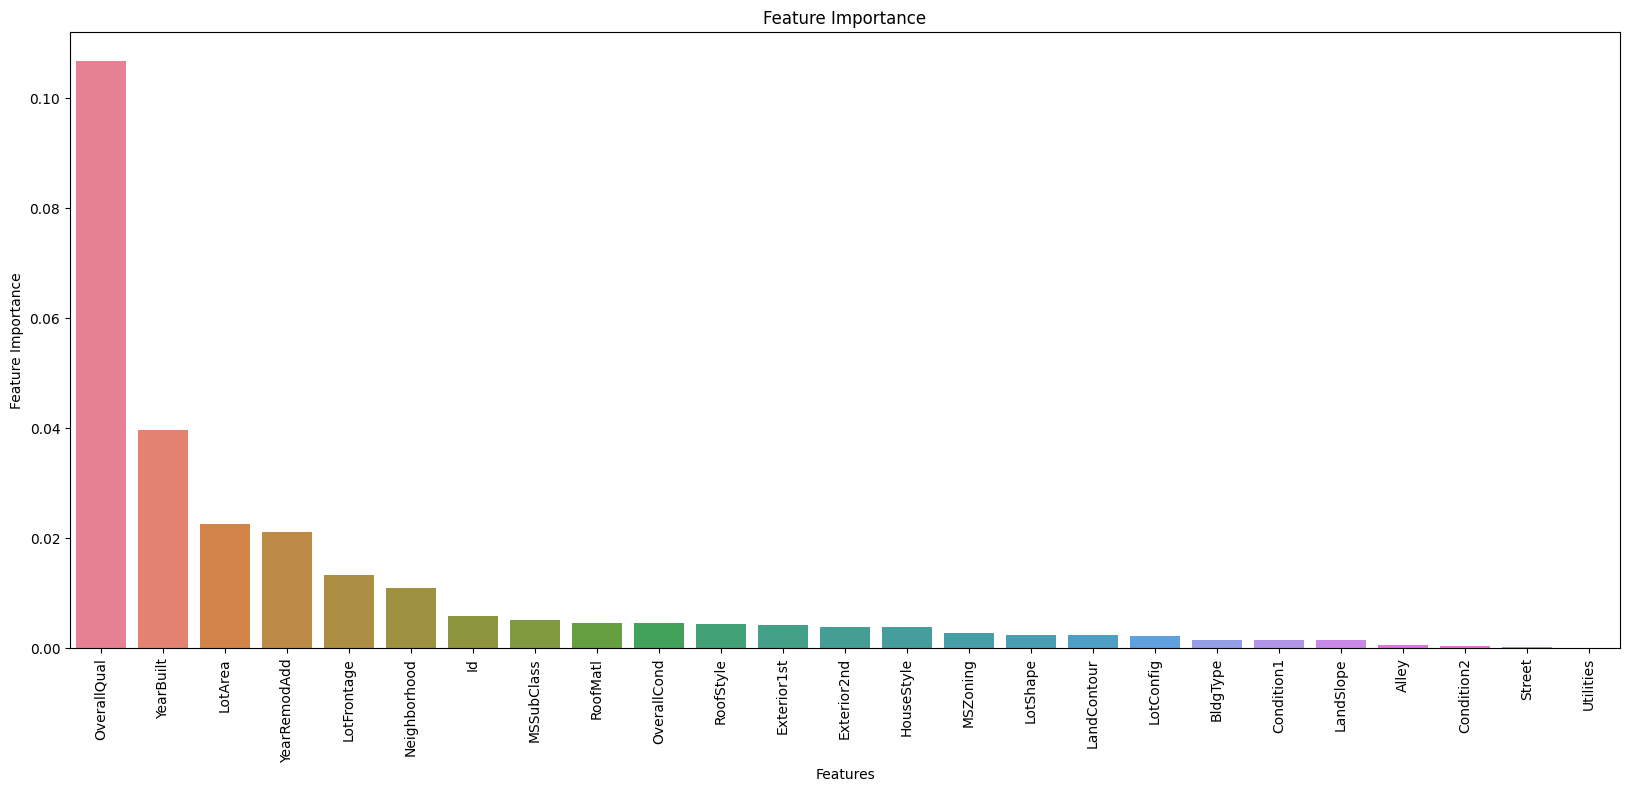

In [66]:
plot_features( x_train.columns , final_model.feature_importances_ )

**The Feature Importances shows that OverallQual feature contributed in the algorithm for predicting the price of each house in the test dataset , followed by YearBuilt , LotArea , YearRemodAdd and the sequence follows**